<a href="https://colab.research.google.com/github/glo-code/ecommerce-analysis/blob/main/ecommerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime

In [3]:
df=pd.read_csv('Amazon Sale Report.csv',parse_dates=True,on_bad_lines='skip',low_memory=False)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False




```
Indagine sui clienti


```



Ordine ID e Status

In [4]:
data=pd.to_datetime(df['Date'])
df['months']=data.dt.month_name()
df['year']=data.dt.year
df['day']=data.dt.day


group=df.groupby(['day','months','year'])[['Order ID','Status']].value_counts().reset_index()
mask=np.where(group['count']<group['count'].max())[0]
print('Order less than max:',group['count'].iloc[mask].sum(),'in the day:',group.iloc[mask])
mask2=group['count'][group['count']==group['count'].max()]
'Order == max:',mask2.value_counts(),'in the day:',group.iloc[mask2.index]


<ipython-input-4-c4cc771dfd87>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.to_datetime(df['Date'])


Order less than max: 128951 in the day:         day months  year             Order ID     Status  count
0         1  April  2022  403-9984530-4477124    Shipped      7
1         1  April  2022  404-5543645-7254764    Shipped      4
2         1  April  2022  407-3670630-4326760    Shipped      4
3         1  April  2022  402-3215188-3221118    Shipped      3
4         1  April  2022  406-9040211-5250700    Shipped      3
...     ...    ...   ...                  ...        ...    ...
120373   31    May  2022  171-1214739-8601135    Shipped      1
120374   31    May  2022  171-1151246-8589957    Shipped      1
120375   31    May  2022  171-1147889-8450743  Cancelled      1
120376   31    May  2022  171-1109176-4700353    Shipped      1
120377   31    May  2022  408-9910860-9722745  Cancelled      1

[120376 rows x 6 columns]


('Order == max:',
 count
 12    2
 Name: count, dtype: int64,
 'in the day:',
        day months  year             Order ID     Status  count
 43715   11  April  2022  403-4984515-8861958    Shipped     12
 46478   11    May  2022  171-5057375-2831560  Cancelled     12)

Notiamo che il massimo di ordini da parte di un cliente è di 12 mentre il minimo è 1.Il massimo di ordini si è verificato sia ad aprile che a maggio, soltanto che a maggio si è trattato non di ordini spediti ma cancellati dallo stesso cliente.
Abbiamo invece contro i 2 ordini più alti, 91354 ordini minimi da più clienti.


In [5]:
count=group.groupby('months')['Status'].value_counts().unstack()
count=count.fillna(0).astype(int)
count

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
months,,,,,,,,,,,,,
April,6726,1,0,27176,0,11093,2,1,2,6,849,2,0
June,4957,577,262,22023,1,5908,0,30,911,5,340,119,8
March,18,0,0,123,0,16,0,0,0,0,1,0,0
May,5484,6,0,23504,0,9549,2,1,5,0,661,9,0


April
June
March
May


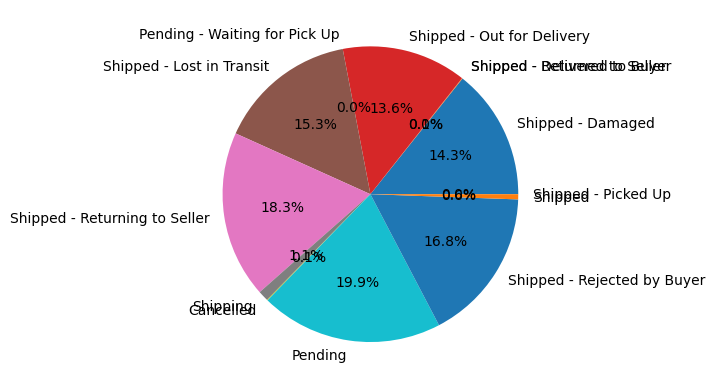

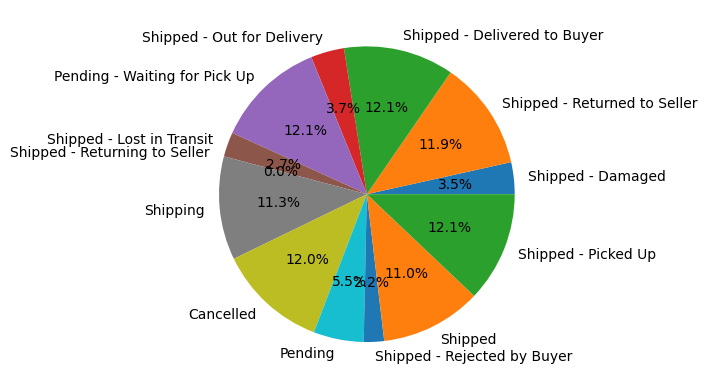

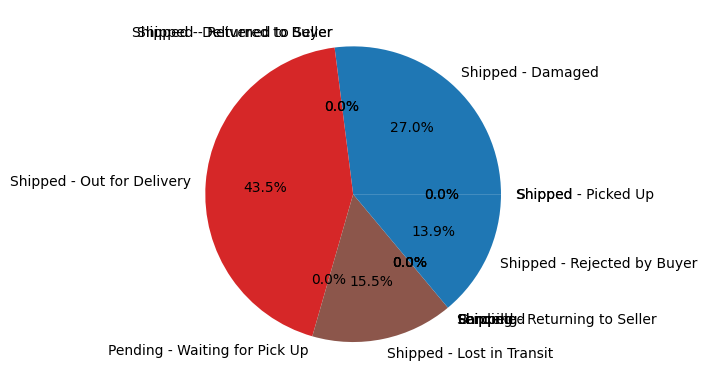

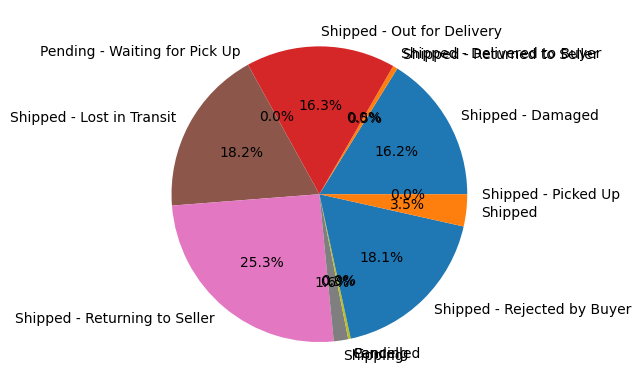

In [6]:
perc_precise=count/count.sum()*100
perc_precise.round(2).reset_index()


labels=set(df['Status'])

conteggio=0
for categorie in perc_precise:
    categorie=perc_precise.iloc[conteggio]
    print(categorie.name)
    ax,fig=plt.subplots()
    plt.pie(categorie,labels=labels,autopct='%1.1f%%')
    conteggio=conteggio+1
    if conteggio==len(perc_precise.index):
       break


Ordini per mese 0    37697
1    42040
2    49067
3      171
dtype: int64
Ordini totali 128975


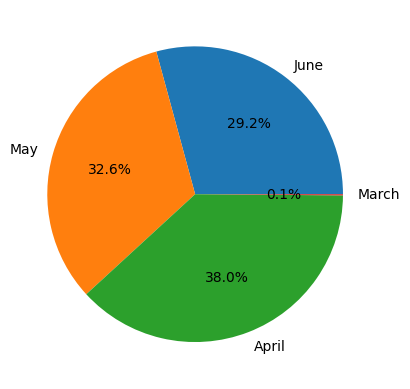

In [7]:
lista_mesi=['June','May','April','March']
ordini_totali=[]
for mese in lista_mesi:
    result=group['count'][group['months']==mese].sum()
    ordini_totali.append(result)

ordini_totali=pd.Series(ordini_totali)
print('Ordini per mese',ordini_totali)
print('Ordini totali',ordini_totali.sum())
perc=ordini_totali/ordini_totali.sum()*100
perc=perc.round(2)

ax,fig=plt.subplots()
plt.pie(perc,labels=lista_mesi,autopct='%1.1f%%')
plt.show()



Notiamo che ad Aprile abbiamo il maggior numero di ordini spediti (17.8%) e cancellati (15,5%). Abbiamo anche un modesto numero di ordini ritornati al venditore e in sospeso(16%). A giugno invece alto numero di ordini spediti ma anche cancellati anche se sono di meno rispetto ad aprile. Pochi però i resi e molti sospesi. A marzo nessun ordine sospeso e pochi cancellati ma ben il 44% degli ordini persi nel transito e 27% cancellati rispetto al 15,5% di aprile. E' il mese in cui si hanno avuti meno ordini. A maggio la maggior parte spediti e cancellati ed un numero moderato minore rispetto ad aprile di resi (21.6% rispetto al 16% di aprile). Pochi sospesi (18% rispetto ad aprile) e il 17% di persi nel transito e cancellati.

Quindi si è venduto di più tra aprile e maggio (47% e 40%) e modertamente a giugno (12%) e di meno a marzo (0.2%).



,Status,count
0,Shipped,60.32
1,Shipped - Delivered to Buyer,22.31
2,Cancelled,14.21
3,Shipped - Returned to Seller,1.51
4,Shipped - Picked Up,0.75
5,Pending,0.51
6,Pending - Waiting for Pick Up,0.22
7,Shipped - Returning to Seller,0.11
8,Shipped - Out for Delivery,0.03
9,Shipped - Rejected by Buyer,0.01


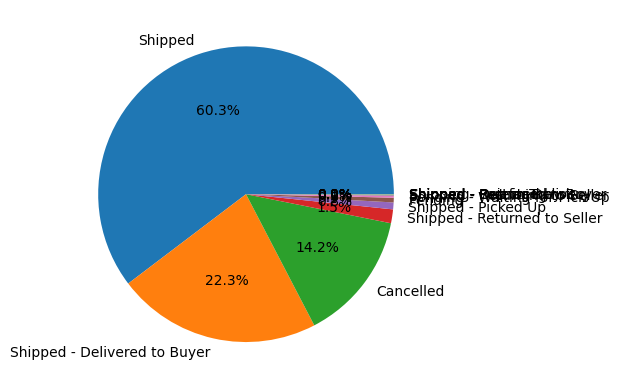

In [8]:
total=df['Status'].value_counts().sum()
status=df['Status'].value_counts().apply(lambda x:x/total*100).round(2).reset_index()
#status=status[status['count']!=0.0]
value=status['count']
fig,ax=plt.subplots()
labels=status['Status']
plt.pie(value,labels=labels,autopct='%1.1f%%')#,startangle=90,shadow=True,labeldistance=0.80,pctdistance=0.5)
status

Notiamo che la maggior parte degli ordini nei mesi indicati, sono stati spediti (circa il 58,8%) mentre il 25 % è stato spedito e consegnato al compratore. Il 14% invece è stato cancellato mentre soltanto 1.8% degli ordini è stato mandato indietro.
Soltanto per il 0,2% invece è stato effettuato il reso ma ancora l'ordine non è ritornato al venditore.



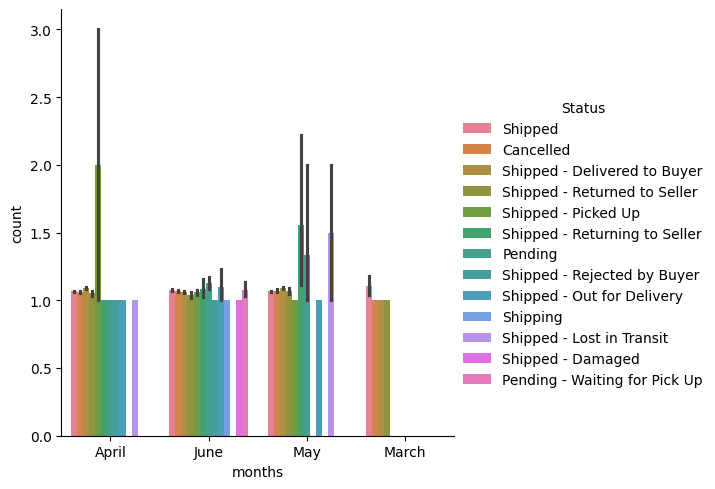

,day,months,year,Order ID,Status,count
0,1,April,2022,403-9984530-4477124,Shipped,7
1,1,April,2022,404-5543645-7254764,Shipped,4
2,1,April,2022,407-3670630-4326760,Shipped,4
3,1,April,2022,402-3215188-3221118,Shipped,3
4,1,April,2022,406-9040211-5250700,Shipped,3
...,...,...,...,...,...,...
120373,31,May,2022,171-1214739-8601135,Shipped,1
120374,31,May,2022,171-1151246-8589957,Shipped,1
120375,31,May,2022,171-1147889-8450743,Cancelled,1
120376,31,May,2022,171-1109176-4700353,Shipped,1


In [9]:

sns.catplot(group,x=group['months'],y=group['count'],kind='bar',hue='Status')
plt.show()
group

Tipo di prodotto acquistato


In [10]:
clothes=df['Category'].value_counts().reset_index()
perc_vestiti=clothes['count']/clothes['count'].sum()*100
vestiti_mesi=df.groupby('Category')['months'].value_counts().unstack()
vestiti_mesi.fillna(0).astype(int)
clothes.sum()

Category    SetkurtaWestern DressTopEthnic DressBlouseBott...
count                                                  128975
dtype: object

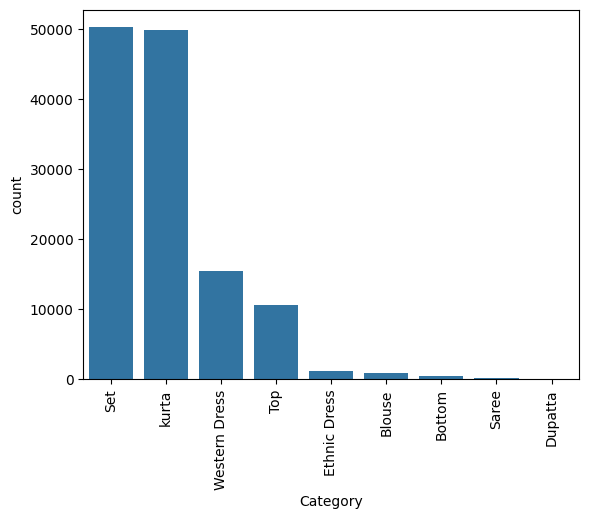

In [11]:
sns.barplot(clothes,x='Category',y='count')
plt.xticks(rotation=90)
plt.show()

Notiamo che i prodotti più acquistati in assoluto sono i set e la kurta e moderatamente il western dress e top. I prodotti meno acquistati sono ethnic dress, blouse, bottom e saree e ancora meno (soltanto 3 acquisti) il dupatta.
Dalle percentuali notiamo che il 39% acquista il set e il 38% il kurta mentre il 12% il western dress e soltanto l'8.2% il top.

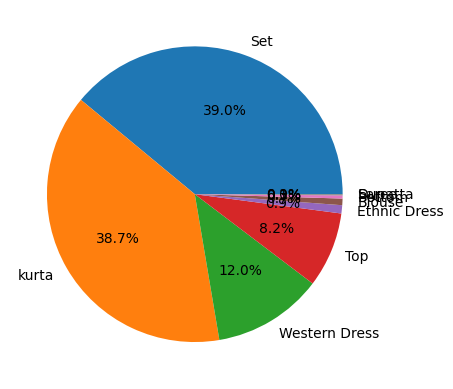

0    38.987401
1    38.671836
2    12.017833
3     8.235705
4     0.898624
5     0.717969
6     0.341151
7     0.127156
8     0.002326
Name: count, dtype: float64

In [12]:
ax,fig=plt.subplots()
plt.pie(perc_vestiti,labels=clothes['Category'],autopct='%1.1f%%')
plt.show()
perc_vestiti

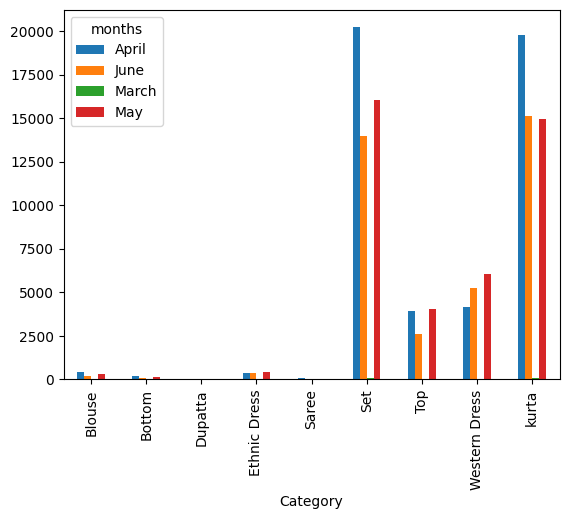

In [13]:
#ax,fig=plt.subplots()
vestiti_mesi.plot(kind='bar')
plt.show()

I set e i kurta sono stati più venduti nel mese di aprile, di più i set e i set anche nel mese di maggio sono stati più venduti rispetto ai kurta, che invece sono stati più venduti durante il mese di giugno. I top e i western dress invece hanno avuto poche vendite rispetto ai set e ai kurta ma i western dress nel mese di maggio e giugno sono stati più venduti rispetto ai top.

In [14]:

taglie=pd.crosstab(df['Category'],[df['Size']]).reset_index()
taglie.round(4)

Size,Category,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
0,Blouse,0,0,0,0,211,136,154,140,133,28,124
1,Bottom,64,0,0,0,0,71,58,74,71,28,74
2,Dupatta,0,0,0,0,3,0,0,0,0,0,0
3,Ethnic Dress,172,0,0,0,0,192,180,176,194,88,157
4,Saree,0,0,0,0,164,0,0,0,0,0,0
5,Set,5795,48,61,81,0,8194,9347,7512,7572,5506,6168
6,Top,1184,0,0,0,0,1774,1825,1238,1855,949,1797
7,Western Dress,1915,0,0,0,0,2845,2587,2225,2379,1431,2118
8,kurta,5686,379,489,657,0,8920,8560,5725,8672,3131,7658


<Axes: xlabel='Size'>

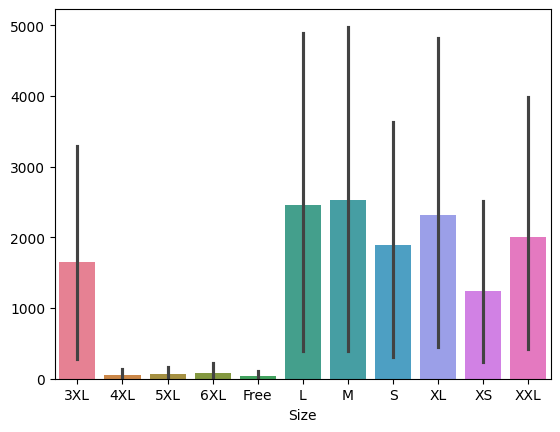

In [15]:
sns.barplot(taglie)

La taglia più venduta è la M/L mentre quella meno venduta è la XS e la 3XL. Mentre le taglie oltre la 3XL sono vendute ancora più raramente e anche la taglia Free.

Spesa


In [16]:
'Il prezzo massimo/minimo e medio sono:',df['Amount'].describe()[['max','min','mean']]
prezzo=df.groupby('months')['Amount'].mean().reset_index()
prezzo

,months,Amount
0,April,626.003046
1,June,661.484424
2,March,627.678086
3,May,663.356858


In [17]:
c=df.groupby('Category')['Amount'].value_counts().unstack()
c.fillna(0).astype(int)

Amount,0.00,199.00,218.10,229.00,236.19,237.14,241.00,246.67,248.00,249.00,...,2676.00,2698.00,2796.00,2860.00,2864.00,2894.00,3036.00,4235.72,5495.00,5584.00
Category,,,,,,,,,,,,,,,,,,,,,
Blouse,22,0,0,1,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
Bottom,12,0,1,14,0,0,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Dupatta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ethnic Dress,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saree,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Set,1013,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,1
Top,174,0,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
Western Dress,231,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
kurta,858,3,0,6,2,4,0,6,4,44,...,0,0,1,0,0,0,0,0,0,0


In media i clienti spendono 648,56 dollari per acquistare la merce in totale. Il prezzo medio ad Marzo è stato 627, a Aprile 626 per poi aumentare a Maggio 663 e scendere leggermente a Giugno 661. Quindi in teoria i prezzi sono saliti tra Maggio e Giugno.

Notiamo però che la maggior parte degli acquisti di alcuni articoli sono costati 0.00 e questa è una cosa strana. Anche se notiamo che tra i kurta ben 44 siano stati venduti a 249.00 mentre 14 bottom a 229.00 e 7 blouse a 249.00 ma il resto è minore.
Perchè la maggior parte degli articoli sono stati acquistati gratis?

In [18]:
promozioni=df.groupby('promotion-ids')['Amount'].value_counts().reset_index()
vestiti_promo=df.groupby('promotion-ids')['Category'].value_counts()#.reset_index()#'amount' con category
vestiti_promo_2=vestiti_promo.copy().reset_index()
print(promozioni[promozioni['count']==promozioni['count'].max()])
promo=df['promotion-ids'].value_counts()#.reset_index()
#kurta=vestiti_promo[vestiti_promo['Category']=='kurta']
#kurta[kurta['Amount']==0.0].sum()
set(promozioni[promozioni['Amount']==0.0]['promotion-ids'].value_counts().reset_index()['promotion-ids'])
#set(vestiti_promo['Sales Channel '])
#perc_promo=promo['count']/promo['count'].sum()*100
#promo_1=promo.copy()
#promo_1['count']=perc_promo.round(2)
#promo_1['count'][(promo_1['count']<57.75)&(promo_1['count']>0.0)].sum()

#print(promo.sum())


vestiti_promo.unstack().fillna(0).astype(int)




                                      promotion-ids  Amount  count
24738  IN Core Free Shipping 2015/04/08 23-48-5-108   399.0   1754


Category,Blouse,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta
promotion-ids,,,,,,,,,
"Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811",0,1,0,0,0,2,1,1,2
"Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant AAT-5WLEJFJPU23IC,Amazon PLCC Free-Financing Universal Merchant AAT-UFMRPWCRGE2ZM,Amazon PLCC Free-Financing Universal Merchant AAT-SF4YGC5K3O574,Amazon PLCC Free-Financing Universal Merchant AAT-SUBB5QVZKACYG,Amazon PLCC Free-Financing Universal Merchant AAT-CF5ZF57364I7G,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811",0,0,0,0,0,0,0,0,3
"Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant AAT-6JADQ56W3E2NG,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811",0,0,0,0,0,1,0,0,2
"Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant AAT-7IFG6TWAZNCBQ,Amazon PLCC Free-Financing Universal Merchant AAT-UFMRPWCRGE2ZM,Amazon PLCC Free-Financing Universal Merchant AAT-SF4YGC5K3O574,Amazon PLCC Free-Financing Universal Merchant AAT-SUBB5QVZKACYG,Amazon PLCC Free-Financing Universal Merchant AAT-CF5ZF57364I7G,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811",0,0,0,0,0,2,0,1,0
"Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant AAT-7L53RVBBSPI3S,Amazon PLCC Free-Financing Universal Merchant AAT-FXGH5APHPAWRQ,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811",0,0,0,0,0,3,0,2,6
...,...,...,...,...,...,...,...,...,...
VPC-44571-41445527 Coupon,0,0,0,0,0,0,0,27,0
VPC-44571-41445561 Coupon,0,0,0,0,0,0,31,0,0
VPC-44571-44201687 Coupon,0,0,0,0,0,0,28,24,0


La promozione più utilizzata è VPC-44571-44201853, usata per circa 46100 volte,quindi si tratta di spedizione gratuita (Il numero più alto di articoli acquistati con questa promozione (1754) è costato 399.0 ed in particolare 1687 sono i kurta acquistati 49877 volte (3,38% degli acquisti)).
458 persone hanno invece utilizzato la promozione collegata alle carte platino, attraverso la quale amazon applica lo sconto sull'ordine permettendo però al venditore di ricevere il guadagno completo.
Questa promozione invece è stata utilizzata per comprare i kurta a 0.0 (291 quindi 0.58%) ma è strano perchè dovrebbe trattarsi di una promozione applicabile solo ai vendito
ri.
In generale 781 articoli sono stati venduti per 0.0 (128975 articolo in totale quindi 0,61%) ed è dovuto a tre promozioni sia questa e due coupon che dovrebbero abbassare il prezzo ma non rendere l'articolo gratuito. Sono tutte promozioni provenienti da Amazon.
In totale il 52% degli articoli sono stati comprati tramite la promozione IN Core Free Shipping 2015/04/08 23-48-5-108
come avevamo già notato mentre lo 0,57% con la promozione free-fancing ed anche sullo 0 è la percentuale dei coupon duplicates.


In [ ]:
mask=vestiti_promo_2['promotion-ids'].str.contains('Amazon')
amazon=vestiti_promo_2[['promotion-ids','count','Category']][mask==True]
coupon=vestiti_promo_2[['promotion-ids','count','Category']][mask==False]
amazon_c=amazon.groupby('Category')[['count','promotion-ids']].sum()
coupon_c=coupon.groupby('Category')[['count','promotion-ids']].sum()


sns.catplot(amazon_c,kind='bar',x='Category',y='count')
plt.xticks(rotation=90)
plt.title('Clothes bought by Amazon Promotion')
plt.show()
sns.catplot(coupon_c,kind='bar',x='Category',y='count',hue='promotion-ids')
plt.xticks(rotation=90)
plt.title('Clothes bought by other promotion')
plt.show()

KeyboardInterrupt: 